In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Convolution2D,Dense,Flatten,MaxPooling2D,BatchNormalization,Dropout
from keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
%matplotlib inline

Using TensorFlow backend.


**Reading the training dataset from CSV file and displaying it.**

In [ ]:
df = pd.read_csv('/content/train.csv')

In [ ]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


* **Dividing the Dataset into X and Y**                                                 
Converting y label to categorical variable that is doing one hot encoding of the labels.
* 0 = [1,0,0,0,0,0,0,0,0,0]
* 1 = [0,1,0,0,0,0,0,0,0,0]
* 2 = [0,0,1,0,0,0,0,0,0,0]
and so on till 9[](http://)

In [ ]:
x = df.drop('label',1)
y = df['label']
y = to_categorical(y)

**Normalizing the data so that processing becomes fast**

In [ ]:
x = x/255.0

In [ ]:
x = x.values.reshape(42000,28,28,1)

In [ ]:
x.shape

(42000, 28, 28, 1)

**Displaying the image of the data.**

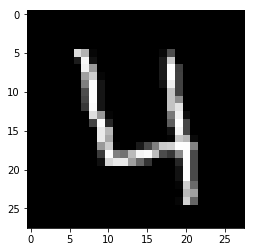

In [ ]:
plt.imshow(x[3].reshape(28,28),cmap = 'gray')

Defining the model now
1. First Layer is a convolution layer with 32 neurons and having a kernel size of (5,5). The padding is kept same which means we are not reducing the dimensions of the image after convolution. Convolution layer will extract features from the images and help it generalize in order to train the neural netwrok and find optimal values for the kernels. Padding will add an additional layer of zeros on all the sides of the image. This convolution layer is followed by the maxpooling layer. We add maxpooling layer for 2 reasons. First is to reduce the dimensions of the image so that processing becomes faster. Secondly to remove the spartiality from the image which is obtained after the convolution layer.

2. Second layer is same as first layer
3. Third and forth layer have Convolution layer with 64 neurons each and kernel size of (3,3) and activation function of relu with padding parameter as same followed by maxpooling layer.
4. Then we flatten the output from convolution layer which is fed to the dense connected layers having 256 neurons and relu activation function followed by a dropout layer of 20% deactivation of neurons.
5. Finally we have the output layer having 10 neurons because those are the number of classes in our y label which uses a softmax function which gives the probability of a particular input belonging to the particular y class.

In [ ]:
model1 = Sequential()
model1.add(Convolution2D(32,(5,5),activation='relu',input_shape = (28,28,1),padding='same'))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(32,(5,5),activation='relu',padding='same'))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(64,(3,3),activation='relu',padding = 'same'))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(64,(3,3),activation = 'relu',padding = 'same'))
model1.add(Flatten())
model1.add(Dense(256,activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(10,activation = 'softmax'))

In [ ]:
model1.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 64)          36928     
__________

In [ ]:
history = model1.fit(x,y,batch_size=32,epochs=10,validation_split=0.1)

Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 11s 302us/step - loss: 0.1911 - acc: 0.9383 - val_loss: 0.0732 - val_acc: 0.9767
Epoch 2/10
37800/37800 [==============================] - 8s 209us/step - loss: 0.0570 - acc: 0.9826 - val_loss: 0.0437 - val_acc: 0.9862
Epoch 3/10
37800/37800 [==============================] - 8s 209us/step - loss: 0.0432 - acc: 0.9866 - val_loss: 0.0388 - val_acc: 0.9876
Epoch 4/10
37800/37800 [==============================] - 8s 212us/step - loss: 0.0326 - acc: 0.9901 - val_loss: 0.0509 - val_acc: 0.9848
Epoch 5/10
37800/37800 [==============================] - 8s 209us/step - loss: 0.0274 - acc: 0.9915 - val_loss: 0.0371 - val_acc: 0.9895
Epoch 6/10
37800/37800 [==============================] - 8s 209us/step - loss: 0.0236 - acc: 0.9926 - val_loss: 0.0294 - val_acc: 0.9910
Epoch 7/10
37800/37800 [==============================] - 8s 208us/step - loss: 0.0191 - acc: 0.9944 - val_loss: 0.0417 - 

In [ ]:
values = history.history
validation_acc = values['val_acc']
training_acc = values['acc']
validation_loss = values['val_loss']
training_loss = values['loss']
epochs = range(10)

Here we plot as graph between Training and Validation Accuracy

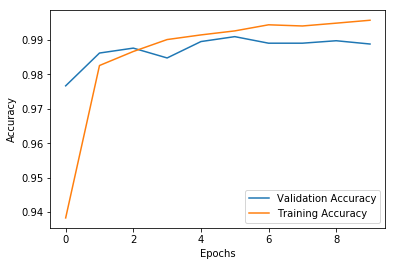

In [ ]:
plt.plot(epochs,validation_acc,label = 'Validation Accuracy')
plt.plot(epochs,training_acc,label = 'Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Here we plot as graph between Training and Validation Loss

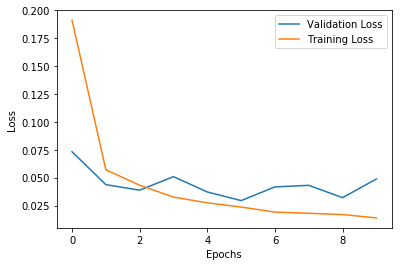

In [ ]:
plt.plot(epochs,validation_loss,label = 'Validation Loss')
plt.plot(epochs,training_loss,label = 'Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Second Model

In [ ]:
model2 = Sequential()
model2.add(Convolution2D(32,(3,3),activation='relu',input_shape = (28,28,1)))
model2.add(Convolution2D(32,(3,3),activation='relu'))
model2.add(Convolution2D(64,(3,3),activation='relu'))
model2.add(Convolution2D(64,(3,3),activation = 'relu'))
model2.add(Flatten())
model2.add(Dense(256,activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(10,activation = 'softmax'))

In [ ]:
model2.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 20, 20, 64)        36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 25600)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               6553856   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
__________

In [ ]:
history = model2.fit(x,y,batch_size=32,epochs=10,validation_split=0.1)

Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 12s 311us/step - loss: 0.1354 - acc: 0.9588 - val_loss: 0.0492 - val_acc: 0.9831
Epoch 2/10
37800/37800 [==============================] - 11s 282us/step - loss: 0.0467 - acc: 0.9849 - val_loss: 0.0365 - val_acc: 0.9876
Epoch 3/10
37800/37800 [==============================] - 11s 280us/step - loss: 0.0304 - acc: 0.9907 - val_loss: 0.0394 - val_acc: 0.9874
Epoch 4/10
37800/37800 [==============================] - 11s 281us/step - loss: 0.0217 - acc: 0.9925 - val_loss: 0.0406 - val_acc: 0.9893
Epoch 5/10
37800/37800 [==============================] - 11s 282us/step - loss: 0.0171 - acc: 0.9943 - val_loss: 0.0374 - val_acc: 0.9881
Epoch 6/10
37800/37800 [==============================] - 11s 281us/step - loss: 0.0150 - acc: 0.9955 - val_loss: 0.0352 - val_acc: 0.9917
Epoch 7/10
37800/37800 [==============================] - 11s 282us/step - loss: 0.0102 - acc: 0.9964 - val_loss: 0.0

In [ ]:
values = history.history
validation_acc = values['val_acc']
training_acc = values['acc']
validation_loss = values['val_loss']
training_loss = values['loss']
epochs = range(10)

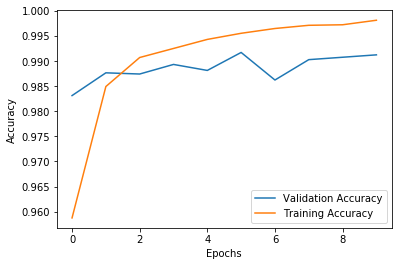

In [ ]:
plt.plot(epochs,validation_acc,label = 'Validation Accuracy')
plt.plot(epochs,training_acc,label = 'Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

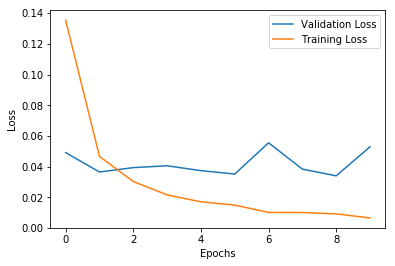

In [ ]:
plt.plot(epochs,validation_loss,label = 'Validation Loss')
plt.plot(epochs,training_loss,label = 'Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Third Model

In [ ]:
model3 = Sequential()
model3.add(Convolution2D(32,(3,3),activation='relu',input_shape = (28,28,1)))
model3.add(MaxPooling2D(2,2))
model3.add(Convolution2D(64,(3,3),activation='relu'))
model3.add(Flatten())
model3.add(Dense(128,activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(10,activation = 'softmax'))

In [ ]:
model3.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
flatten_3 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               991360    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total para

In [ ]:
history = model3.fit(x,y,batch_size=32,epochs=10,validation_split=0.1)

Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 8s 201us/step - loss: 0.1605 - acc: 0.9499 - val_loss: 0.0502 - val_acc: 0.9826
Epoch 2/10
37800/37800 [==============================] - 7s 184us/step - loss: 0.0523 - acc: 0.9840 - val_loss: 0.0473 - val_acc: 0.9855
Epoch 3/10
37800/37800 [==============================] - 7s 186us/step - loss: 0.0358 - acc: 0.9886 - val_loss: 0.0519 - val_acc: 0.9845
Epoch 4/10
37800/37800 [==============================] - 7s 185us/step - loss: 0.0272 - acc: 0.9912 - val_loss: 0.0385 - val_acc: 0.9890
Epoch 5/10
37800/37800 [==============================] - 7s 183us/step - loss: 0.0206 - acc: 0.9933 - val_loss: 0.0392 - val_acc: 0.9890
Epoch 6/10
37800/37800 [==============================] - 7s 184us/step - loss: 0.0166 - acc: 0.9945 - val_loss: 0.0389 - val_acc: 0.9895
Epoch 7/10
37800/37800 [==============================] - 7s 184us/step - loss: 0.0143 - acc: 0.9949 - val_loss: 0.0445 - v

In [ ]:
values = history.history
validation_acc = values['val_acc']
training_acc = values['acc']
validation_loss = values['val_loss']
training_loss = values['loss']
epochs = range(10)

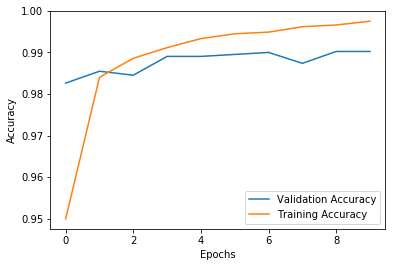

In [ ]:
plt.plot(epochs,validation_acc,label = 'Validation Accuracy')
plt.plot(epochs,training_acc,label = 'Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

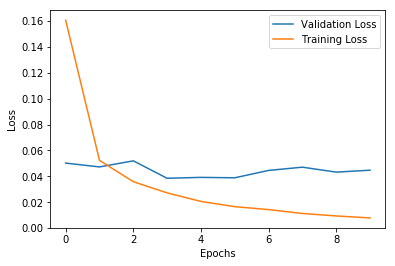

In [ ]:
plt.plot(epochs,validation_loss,label = 'Validation Loss')
plt.plot(epochs,training_loss,label = 'Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Fourth Model

In [ ]:
model4 = Sequential()
model4.add(Convolution2D(32,(5,5),activation='tanh',input_shape = (28,28,1),padding='same'))
model4.add(MaxPooling2D(2,2))
model4.add(Convolution2D(32,(5,5),activation='tanh',padding='same'))
model4.add(MaxPooling2D(2,2))
model4.add(Convolution2D(64,(3,3),activation='tanh',padding = 'same'))
model4.add(MaxPooling2D(2,2))
model4.add(Convolution2D(64,(3,3),activation = 'tanh',padding = 'same'))
model4.add(Flatten())
model4.add(Dense(256,activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(10,activation = 'softmax'))

In [ ]:
model4.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 32)        25632     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 3, 3, 64)          36928     
__________

In [ ]:
history = model4.fit(x,y,batch_size=32,epochs=10,validation_split=0.1)

Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 9s 229us/step - loss: 0.1773 - acc: 0.9431 - val_loss: 0.0766 - val_acc: 0.9767
Epoch 2/10
37800/37800 [==============================] - 8s 211us/step - loss: 0.0702 - acc: 0.9787 - val_loss: 0.0509 - val_acc: 0.9819
Epoch 3/10
37800/37800 [==============================] - 8s 208us/step - loss: 0.0541 - acc: 0.9836 - val_loss: 0.0687 - val_acc: 0.9786
Epoch 4/10
37800/37800 [==============================] - 8s 208us/step - loss: 0.0467 - acc: 0.9864 - val_loss: 0.0614 - val_acc: 0.9843
Epoch 5/10
37800/37800 [==============================] - 8s 207us/step - loss: 0.0408 - acc: 0.9870 - val_loss: 0.0401 - val_acc: 0.9879
Epoch 6/10
37800/37800 [==============================] - 8s 221us/step - loss: 0.0323 - acc: 0.9905 - val_loss: 0.0668 - val_acc: 0.9812
Epoch 7/10
37800/37800 [==============================] - 8s 211us/step - loss: 0.0362 - acc: 0.9900 - val_loss: 0.0480 - v

In [ ]:
values = history.history
validation_acc = values['val_acc']
training_acc = values['acc']
validation_loss = values['val_loss']
training_loss = values['loss']
epochs = range(10)

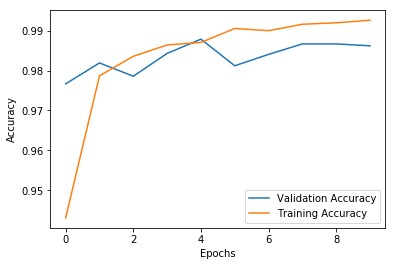

In [ ]:
plt.plot(epochs,validation_acc,label = 'Validation Accuracy')
plt.plot(epochs,training_acc,label = 'Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

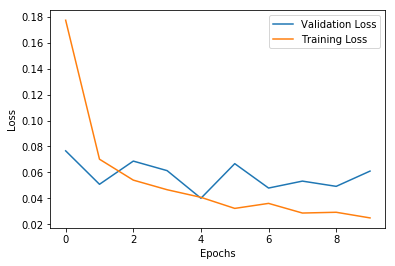

In [ ]:
plt.plot(epochs,validation_loss,label = 'Validation Loss')
plt.plot(epochs,training_loss,label = 'Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
plot_model(model1,to_file='model1.png',show_layer_names=True,show_shapes=True)
plot_model(model2,to_file='model2.png',show_layer_names=True,show_shapes=True)
plot_model(model3,to_file='model3.png',show_layer_names=True,show_shapes=True)
plot_model(model4,to_file='model4.png',show_layer_names=True,show_shapes=True)

In [ ]:
test = pd.read_csv('../input/test.csv')

In [ ]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
sub = pd.read_csv('../input/sample_submission.csv')

In [ ]:
sub.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [ ]:
test = test/255.0

In [ ]:
test.shape

(28000, 784)

In [ ]:
test = test.values.reshape(28000,28,28,1)

In [ ]:
predict_model1 = model1.predict_classes(test)

In [ ]:
predict_model2 = model2.predict_classes(test)

In [ ]:
predict_model3 = model3.predict_classes(test)

In [ ]:
predict_model4 = model4.predict_classes(test)

In [ ]:
final_prediction = 0.25*predict_model1+0.25*predict_model2+0.25*predict_model3+0.25*predict_model4

In [ ]:
final_prediction = np.round(final_prediction)


In [ ]:
answer = []
for i in range(len(final_prediction)):
    answer.append(int(final_prediction[i]))

In [ ]:
predict = pd.Series(answer,name="Label")

In [ ]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),predict],axis = 1)

In [ ]:
submission.to_csv("cnn_mnist_datagen.csv",index=False)

In [ ]:
predict = pd.Series(predict_model1,name="Label")
submission_1 = pd.concat([pd.Series(range(1,28001),name = "ImageId"),predict],axis = 1)
submission_1.to_csv("submission1.csv",index=False)

In [ ]:
predict = pd.Series(predict_model2,name="Label")
submission_2 = pd.concat([pd.Series(range(1,28001),name = "ImageId"),predict],axis = 1)
submission_2.to_csv("submission2.csv",index=False)

In [ ]:
predict = pd.Series(predict_model3,name="Label")
submission_3 = pd.concat([pd.Series(range(1,28001),name = "ImageId"),predict],axis = 1)
submission_3.to_csv("submission3.csv",index=False)

In [ ]:
predict = pd.Series(predict_model4,name="Label")
submission_4 = pd.concat([pd.Series(range(1,28001),name = "ImageId"),predict],axis = 1)
submission_4.to_csv("submission4.csv",index=False)

Here I have created 4 different models with different architecture in order to see which one performs better on the data. You are free to make any changes in the architecture. There is no hard and fast rule which helps you decide number of neurons or number of layers. They all are hyperparameters and different for every problem statement. A common approch is to start with number of neurons with 2^n value (8,16,32,64,128,256,512....). making your model more complex can lead to overfitting.